# <center>Desafio 1: 
# <center>Análisis exploratorio de un dataset de precios de propiedades


### Grupo 8:
- Pablo Haedo
- Marx Morales
- Guillermo Portero
- Alejandra Fusco


### Índice:
<a href='#section1'>**1. Carga de datos de Properatti**</a><br>
<a href='#section2'>**2. Análisis del Dataset**</a><br>
<a href='#section3'>**3. Manipulación de los datos**</a><br>
<a href='#section3_1'>**3.1. Eliminamos columnas**</a><br>
<a href='#section3_2'>**3.2. Exploramos cada columna restante**</a><br>
<a href='#section3_2_1'>**3.2.1 Ambientes**</a><br>
<a href='#section3_2_2'>**3.2.2 Ambientes**</a><br>
<a href='#section3_2_3'>**3.2.3 Ubicación**</a><br>
<a href='#section3_2_4'>**3.2.4 Precios**</a><br>


## Importación de librerías:

In [2]:
#Importamos lirerías:
import os
import numpy as np
import pandas as pd
import re
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import json
import time
from pandas.io.json import json_normalize

<a id='section1'></a>
## 1. Carga de datos:
Levantamos el archivo que contiene los datos de publicaciones de propiedades del año 2017 en la plataforma Properati.

In [3]:
#Levantamos la base de properati:
df = pd.read_csv('properatti.csv')

<a id='section2'></a>
## 2. Análisis del Dataset:
Hacemos una primera visualización de datos, tomando una muestra de 10 registros al azar.

In [4]:
#Modificamos algunos parametros de plt
plt.rcParams['figure.figsize'] = (10,10) # 20 pulgadas de ancho y 20 de alto para todos los plots( modificamos el tamaño de las graficas
# Para mostrar todas las columnas:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", 1000)
# Muestra de los datos:
df.head(10)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,1093959.00,62000.00,55.0,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mataderos_lavadero_patio_inmobiliaria-fedele,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEVO, PATIO GRANDE, CON LAVADERO, LIVING COMEDOR CON COCINA INTEGRADA, ARTEFACTO DE COCINA, ALACENA, BAÑO COMPLETO, Y DORMITORIO. TODO EN EXCELENTE ESTADO, PARA HABITAR.NO ES APTO CREDITO Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIKufMJMwHtquzhk=/trim/198x0/smart/filters:strip_icc()/inmobiliariafedele.com/photos/CARHUE%202278-IMG_3400.JPG
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,150000.0,USD,2646675.00,150000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_departamentos_la-plata_balcon_lavadero_toilette_garage_estrenar_antonini-propiedades_dcp,"Venta de departamento en décimo piso al frente, a estrenar. Living comedor con ventanales hacia el balcón con pisos de madera. Cocina completa con doble mesada, muebles bajo mesada. Lavadero separado. Toilette.Dormitorio con placard. Segundo dormitorio a dividir. Calefacción por radiadorBaño completo.Balcón corrido. Posibilidad de cochera semicubierta. U$D 20.000 Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).",VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv45KAKirGL3JM8=/trim/198x0/smart/filters:strip_icc()/antoninipropiedades.com/photos/401-1-7%20y%2037%2010A%201.jpg
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,1270404.00,72000.00,55.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_departamentos_mataderos_lavadero_placard_inmobiliaria-fedele,"2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AMPLIO COCINA SEPARADA CON LAVADERO, BAÑO COMPLETO Y DORMITORIO CON PLACARD. BAJAS EXPENSAS, EXCELENTE UBICACION Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).",2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_Ejwfu6QpW4cH0=/trim/198x0/smart/filters:strip_icc()/inmobiliariafedele.com/photos/GUAMINI%201171-IMG_3403.JPG
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,95000.0,USD,1676227.50,95000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_liniers_patio_g-goffredo,"PH 3 ambientes con patio. Hay 3 deptos en lote, 2 en PB y 1 en 1º piso.Reciclado a nuevo. ""Muy buen estado"" Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).",PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SPyleyeQlIypI8w=/trim/198x0/smart/filters:strip_icc()/ggoffredo.com/photos/GG0040-1563480102.jpg
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Centro|,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,64000.0,USD,1129248.00,64000.00,35.0,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_departamentos_centro_cristina-pavone-negocios-inmobiliarios,"DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURAL, AL CONTRAFREN

Visualizamos la estructura del dataset y la distribución de los datos.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
Unnamed: 0                    121220 non-null int64
operation                     121220 non-null object
property_type                 121220 non-null object
place_name                    121197 non-null object
place_with_parent_names       121220 non-null object
country_name                  121220 non-null object
state_name                    121220 non-null object
geonames_id                   102503 non-null float64
lat-lon                       69670 non-null object
lat                           69670 non-null float64
lon                           69670 non-null float64
price                         100810 non-null float64
currency                      100809 non-null object
price_aprox_local_currency    100810 non-null float64
price_aprox_usd               100810 non-null float64
surface_total_in_m2           81892 non-null float64
surface_covered_in_m2         101313 no

Vemos la cantidad de NaN por columna:

In [6]:
df.isna().sum()

Unnamed: 0                         0
operation                          0
property_type                      0
place_name                        23
place_with_parent_names            0
country_name                       0
state_name                         0
geonames_id                    18717
lat-lon                        51550
lat                            51550
lon                            51550
price                          20410
currency                       20411
price_aprox_local_currency     20410
price_aprox_usd                20410
surface_total_in_m2            39328
surface_covered_in_m2          19907
price_usd_per_m2               52603
price_per_m2                   33562
floor                         113321
rooms                          73830
expenses                      106958
properati_url                      0
description                        2
title                              0
image_thumbnail                 3112
dtype: int64

<a id='section3'></a>
## 3. Manipulación de los datos:

<a id='section3_1'></a>
### 3.1. Eliminamos columnas:

<a id='section3_1_1'></a>
3.1.1. Columna Operación: Todos los registros contienen el mismo valor "Sell". No suma valor almacenar éste campo.

In [7]:
#Operación: todos los registros son venta:
df.drop(columns=['operation'], inplace=True)

<a id='section3_1_2'></a>
3.1.2. Columna Image_thumbnail: Provee la localización de la imagen de la propiedad, que se muestra en la publicación. Las imágenes no se encuentran activas y de todos modos no suman valor.

In [8]:
#La dirección de la imagen, no nos sirve:
df.drop(columns=['image_thumbnail'], inplace=True)

<a id='section3_2'></a>
### 3.2. Exploramos cada columna restante

<a id='section3_2_1'></a>
### 3.2.1 Tipo de propiedad:

In [53]:
# analizamos la estructura de la columna
df['property_type'].value_counts()

apartment    71065
house        40268
PH            5751
store         4136
Name: property_type, dtype: int64

In [54]:
# verificamos si hay propiedades que estén erróneamente asignadas, a priori, en función al precio
df.price_aprox_usd.describe()

count    1.008100e+05
mean     2.397006e+05
std      3.913239e+05
min      0.000000e+00
25%      8.973388e+04
50%      1.450000e+05
75%      2.650000e+05
max      4.654544e+07
Name: price_aprox_usd, dtype: float64

In [55]:
serie = df["price_aprox_usd"] > 4000000
df.loc[serie,["property_type","price_aprox_usd","surface_total_in_m2","description"]].sort_values(by ='price_aprox_usd',ascending=False)

,property_type,price_aprox_usd,surface_total_in_m2,description
24548,apartment,46545445.00,200000.0,dsdffhghvcvbcdfdfghdfhghkjhkhjklhjkfgvghfghnfghgfhfg
91468,house,25000000.00,NaN,"Casa con Agua Corriente, Córdoba, Punilla, por U$S 25.000.000"
107390,house,22980378.29,NaN,"Casa con Calefacción central, Mendoza, San Roque, por $ 650.000.000"
91479,house,19500000.00,NaN,"\tCECILIA INMUEBLES OFRECE:INCREIBLE PROPIEDAD EN SIQUIMAN Bº LAS MORADAS II TERRENO ESQUINA A 50 METROS DE LA RUTA 38 – A 200 METROS DEL RIO LAS MOJARRAS APROX – A 400 MTS DEL PUENTE LAS MOJARRAS – 11KM DE CARLOS PAZ Y 600 MTS APROX AL LAGO SAN ROQUE - EXCELENTE ENTORNO - RODEADO DE NATURALEZACALLE: ORION Y 2 MUNDOS COMO LLEGAR: POR RUTA 38 PASANDO PUENTE DE LOS PESCADORES 200 METROS A LA DERECHA BARRIO LAS MORADAS II SE ENCUENTRAN DOS PILARES DE PIEDRA INGRESO POR CALLE ORION A 50 MTS SE ENCUENTRA LA PROPIEDAD EN UNA ESQUINA.COORDENADAS: Latitud: -31.342095Longitud: -64.475886SUP CUB: 160M2 - SUP DE TERRENO: 2 TERRENOS (CADA UNO 290M2 APROX) 600M2 APROX TODO PARQUIZADO – PILETA 4,50 X 9 X 1,85 (PROFUNDIDAD DE 50 A 185)COCHERA – ASADOR + COCHERA AUXILIAR CASA PRINCIPAL: LIVING COMEDOR CON VISTA A LAS SIERRAS C/HOGAR DE MARMOL ROSA TALLADO SALA DE ESTAR EN DESNIVEL CON INCREIBLE VISTA A LAS SIERRAS C/BARRA DE GRANITO NATURAL – SALAMANDRA COCINA COMEDOR PRINCIPAL (7 X 3,50 APROX) AM..."
91289,house,16000000.00,NaN,"En Bv Artigas 876 , Parque Jardín, La Falda .A 8 cuadras de la ruta, a la altura del anfiteatro. De la iglesia la falda de la falda 5 cuadras. Zona urbanizada, inmejorable entorno. En entorno natural vista a las sierras. A 100 mtrs asfalto.Servicios: cloacas, luz, agua, a 100 gas natural. Lo están colocando.Sup. Terreno: 770 m2 sup. cubierta : 190- planos aprobados imp. al día. Escritura – imp. Al día3 dorm con placard empotrado amplios luminosos (1 en suite bño zonificado) 2 baños en total. Living – comedor diario con hogar –cocina amoblada bajo mesada y alacena-Aberturas puertas ventanas de aluminio con mosquiteros corredizas. Rejas.Patio árboles frutales – parquizado-Techo de loza 2 tanques de agua –25 años aprox.Permuta por propiedad en cordoba barrio alto verde – alta cba – general paz club universtaria"
49083,house,15500000.00,NaN,"CODIGO: 1092-vta-angostura ubicado en: Villa La angostura - Publicado por: SPOLITA PROPIEDADES. El precio es de USD 15500000 null. Espectacular castillo de 1500 mt2 sobre una loma con hermosa vista al lago,campo de 2500 hectareas dentro del Parque Nacional.Casa de huespedes,13 cabañas de 90 mt2 c/una.Galpones. Abetos,Cipreses y Lengas. . Publicado a través de Mapaprop"
91428,house,14700000.00,NaN,"\tCECILIA INMUEBLES OFRECE:APTO CREDITO HIPOTECARIO (PLANOS APROBADOS, ESCRITURA) CASA EN PARQUE SIQUIMAN, A 10KM DE COSQUÍN Y 10KM DE CARLOS PAZ, EXCELENTE PUNTO TURÍSTICO.UBICADA, A DOS CUADRAS DE LA RUTA , barrio centro CERCA DE LA PLAZA.CARACTERISTICAS:-SUPERFICIE TERRENO: 20 X 40: 800 mts2-SUPERFICIE CUBIERTA: 200m2-PLANOS APROBADOS, LISTA PARA ESCRITURARLA -PROPIEDAD CUENTA CON DOS CASAS más un terreno de 20 x 40-CASA : COCINA CON LAVADERO,LIVING-COMEDOR, GALERÍA CERRADA, 2 HABITACIONES, COCHERA PARA DOS AUTOS (galpón 12 x 6,50)- QUINCHO CON PARRILLA, HORNO CHILENO Y BAÑO.DPTO: COCINA-COMEDOR, LAVADERO Y 2 HABITACIONES.PILETA DE 5,60 x 2,80mts-TODAS LAS VENTANAS DE LA CASA TIENEN REJAS, POSTIGOS Y TELA METALICA-ALARMA-VENTILADOR DE TECHO Y CALEFACTOR-VALOR: U$S 125.000 MAS EL TERRENO: U$S 147.00(Villa Parque Sìquiman se encuentra ubicada en el Departamento Punilla , Pedanía San Roque, al borde de la Ruta Nacional N° 38; 5 Km al sur de la localidad de Bialet Massé a 10 Km al n..."
34638,house,14000000.00,2079.0,"Excelente zona. Cerca de la Quinat Presidencial. Entre Uribelarrea y Villate. Zonificacion. Exclente lote con 43 mts de Frente sobre Libertador. ZONFICIACION: T3L. Apto PB y 7 pisos mÃ¡s. 8 pisos en total. FOT 2,65. FOZ 0,60. PREMIUM AA. Acepta pago en metros tambiÃ©n."
91229,house,14000000.00,NaN,"Casa con Agua

<a id='section3_2_2'></a>
### 3.2.2 Ambientes:

Revisamos la distribución de los datos del campo Rooms, que representa lo que en argentina es "Ambientes".

In [9]:
#Cantidad de registros en cada valor:
df['rooms'].value_counts()

3.0     12567
2.0     12433
4.0      7937
1.0      7377
5.0      3782
6.0      1403
7.0       770
8.0       409
10.0      226
9.0       184
11.0       72
12.0       65
13.0       33
14.0       27
15.0       26
17.0       16
16.0       11
20.0       11
22.0        8
18.0        6
21.0        5
30.0        4
25.0        4
19.0        4
32.0        3
23.0        2
24.0        1
27.0        1
29.0        1
31.0        1
28.0        1
Name: rooms, dtype: int64

In [10]:
# Visualizamos si los campos de título y descripción, 
# podrían ayudarnos a validar o completar el campo rooms:
df.loc[:,["rooms","description","title"]]

,rooms,description,title
0,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEVO, PATIO GRANDE, CON LAVADERO, LIVING COMEDOR CON COCINA INTEGRADA, ARTEFACTO DE COCINA, ALACENA, BAÑO COMPLETO, Y DORMITORIO. TODO EN EXCELENTE ESTADO, PARA HABITAR.NO ES APTO CREDITO Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).",2 AMB TIPO CASA SIN EXPENSAS EN PB
1,NaN,"Venta de departamento en décimo piso al frente, a estrenar. Living comedor con ventanales hacia el balcón con pisos de madera. Cocina completa con doble mesada, muebles bajo mesada. Lavadero separado. Toilette.Dormitorio con placard. Segundo dormitorio a dividir. Calefacción por radiadorBaño completo.Balcón corrido. Posibilidad de cochera semicubierta. U$D 20.000 Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).",VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37
2,NaN,"2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AMPLIO COCINA SEPARADA CON LAVADERO, BAÑO COMPLETO Y DORMITORIO CON PLACARD. BAJAS EXPENSAS, EXCELENTE UBICACION Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).",2 AMB 3ER PISO CON ASCENSOR APTO CREDITO
3,NaN,"PH 3 ambientes con patio. Hay 3 deptos en lote, 2 en PB y 1 en 1º piso.Reciclado a nuevo. ""Muy buen estado"" Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).",PH 3 amb. cfte. reciclado
4,NaN,"DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURAL, AL CONTRAFRENTE, EDIFICIO DE POCAS UNIDADES Y MUY BIEN CONSERVADO. EN ESTADO ORIGINAL.-POSEE: 1 DORMITORIOS, 1 BAÑO COMPLETO, LIVING COMEDOR Y COCINA SEPARADA.-EN ESTADO ORIGINAL.- Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).",DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA MITRE
5,NaN,"Casa en el perímetro del barrio 338, ubicada en el extremo sur este del barrio, sobre calle 3 de caballería casi Nágera. Vista libre a terreno en frente.Consta de dos dormitorios, baño, living cocina comedor integrado de buen tamaño, lavadero con despensero en aluminio.Patio privado con churrasquera, tapiales y puerta de acceso de servicio. Frente con rejas y pequeño patio con verde, porch de acceso.Gas natural en la puerta. Aire acondicionado frío/calor. Baulera para guardado sobre pasillo. Muy buen estado en general de pisos, revestimientos, pintura, etc.Apto crédito. Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).","Casa Barrio 338. Sobre calle 3 de caballería, casi Nágera. Dos habit. Muy buen estado, patio con tapiales."
6,NaN,MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENTE - SIN EXPENSAS! TODO EN PLANTA BAJA DOS DORMITORIOS (pisos de pinotea) - LIVING - COCINA COMEDOR - BAÑO - PATIO - GALPÓN Y LAVADERO EN EL PATIOEN MUY BUEN ESTADO - INMEJORABLE UBICACIÓN - A 1 CUADRA DE LA ESTACIÓN DE MUNRO - CERCA DE MAS DE 6 LINEAS DE COLECTIVOS - A 2 CUADRAS DEL CENTRO UNIVERSITARIO. 106 m2 TOTALES: 78 m2 CUBIERTOS Y 28 m2 DESCUBIERTOSAPTO PROFESIONAL Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).,"MUY BUEN PH AL FRENTE DOS DORMITORIOS , PATIO, EXCELENTE UBICACION EN MUNRO"
7,NaN,"EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER LUMINOSO ...PISO ALTO COCINA AMERICANA. BAÑO COMPLETO PILETA ,SOLARIUM, LAUNDRY APTO PROFESIONALPROXIMO AV DEL LIBERTADOR MUY BUENA ZONA !!!! Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).","JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CATEGORIA , VENTA"
8,NaN,"EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER LUMINOSO ...PISO ALTO COCINA AMERICANA. BAÑO COMPLETO PILETA ,SOLARIUM, LAUNDRY APTO PROFESIONALPROXIMO AV DEL LIBERTADOR MUY BUENA ZONA !!!! Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).","JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR , CATEGORIA , VENTA"
9,NaN,"MEDNOZA AL 7600A UNA CUADRA DE CALLE MENDOZAWHITE 7637 SECTOR E MONOBLOK 67LISTO PARA ESCRITURARPLANTA BAJA CON PATIO2 DORMITORIOSLI

In [11]:
#Vemos si las propiedades con más de 20 ambientes realmente lo son:
df[df['rooms']>20].loc[:,['rooms','description','title','surface_total_in_m2','property_type','surface_covered_in_m2']]

,rooms,description,title,surface_total_in_m2,property_type,surface_covered_in_m2
877,22.0,"Corredor Responsable: Mario Gabriel Gerez - CUCICBA 6477Contacto: Juan Salvador Córdova - MLS ID # 371159-12Se Vende, solos o en bloque piso en Calle peru, pleno centro. El inmueble funciona actualmente como hotel familiar. Y se entrega libre de ocupantes, a menos que se especifique lo contrario. La renta actual es de aproximadamente $ 50.000 por mes. El piso se compone de la siguiente manera. 472 metros totales 346 metros cubiertos 88 semicubiertos 37 descubiertos Preguntar por la opción de comprar el edificio entero. Martillero y Corredor Público Mario G. Gerez MPCSI 6012 / CUCICBA 6477 Av. Del Libertador 618 Vicente Lopez, 1642 Vicente Lopez, Argentina",Venta Hotel Familiar Calle Peru al 100,NaN,apartment,472.0
14714,25.0,"Corredor Responsable: Hernan Perrone - CMCPDJMGR 170Contacto: Eduardo Kenny - MLS ID # 420411004-59Departamento muy bien ubicado.Cuenta con un dormitorio amplio y un segundo dormitorio más pequeño, living/comedor, baño completo y cocina.",Departamento en Moreno Centro,NaN,apartment,51.0
27354,25.0,"Corredor Responsable: Edgardo Tamarit - CPCPI 4228Contacto: Laura Kotoucek - MLS ID # 420401043-79SE VENDE HOSTERÍA A REFACCIONAR EN LA FALDA CÓRDOBA!! Queres invertir?? no lo dudes.... muy buena ubicación, ya que esta a una cuadra de la ruta 38 a tres cuadras del Super Max de la entrada de La Falda. Tiene una vista impresionante a las sierras... Tiene una casa atrás de 3 dormitorios, 2 baños, Comedor, cocina, living y asador 5 piezas con baño privado (de las cuales 3 estan alquiladas x mes) 3 Departamentos: 1 Monoambiente 1 con dos habitaciones, baño living y cocina comedor 1 con una habitación living cocina comedor y baño Llamanos y vamos a verla...",SE VENDE HOSTERIA A REFACCIONAR LA FALDA CORDOBA,NaN,house,650.0
28078,25.0,"Corredor Responsable: DANIELA E. CASTRO - CPCPI 5292Contacto: Juan Pablo Moyano Centeno - MLS ID # 420201171-3El predio tiene 10.300 M2 de los cuales 850 M2 están construidos y EN MUY BUEN ESTADO -Posee cocheras con media sombra (3) -Dos garajes -Pileta con solárium -Al frente amplio jardín, CON CANTEROS Y FLORES, GRAN PARQUE, AÑOSA ARBOLEDA , FRUTALES -El parque en su mayoría es plano. El inmueble cuenta con: -6 baños en suite, 2 baños completos y 2 de servicio, TODOS EN PERFECTO ESTADO. -Posee dos living, ambos amplios y con ventanales al parque. -Sala de estar,posee comedor y sala, gran living, estar comedor, y ambientes muy amplios. -Cocina COMPLETA Y PREPARADA PARA COCINA ALTERNATIVA. Posee amplia ante cocina con placares -Dormitorios:Cuenta con 10 habitaciones amplias, 6 de ellas con baño propio. -Sus Galerías:Posee dos hermosas galerías de estilo colonial con vista al parque y a su pileta. -Asador -Lavadero. Posee amplio espacio. A metros de la misma nos encontramos con ...",SE VENDE CASONA APTA HOTEL EN VALLE HERMOSO,NaN,house,850.0
33818,30.0,"Corredor Responsable: Matiaz Ruiz Moreno - CPCPI 4740Contacto: Fabiana Pereyra - MLS ID # 420581024-86VENDO OPORTUNIDAD COSTO-CALIDAD APART-HOTEL SOBRE COSTANERA SANTA ROSA DE CALAMUCHITA Oportunidad de Inversión en Santa Rosa de Calamuchita . Enclavado frente al río y a pocas cuadras del centro de la ciudad. Sobre la costanera de fácil acceso desde ruta 5. Actualmente en actividad . Superficie de 650 m2 en dos plantas sobre terreno de 1300 m2 CARACTERÍSTICAS: Recepción vidriada en el ingreso principal con baño( mobiliario de oficina) 9 departamentos Lavadero ( lavarropas industrial, secadora Marva y plancha manual) Solarium Sala de juego (mesa de pool, metegol y mesa de ping-pong) Depósito (herramienta, máquina de cesped, aspiradora e hidro-lavadora) Quincho ( 3 parrillas con baño, mesas, sillas, tablas, utensilios) Piscina climatizada (sistema solar y cerramiento telescópico y jacuzzi) Cochera y tender (acceso por portón automático) Terraza ( vista al Río para tiempo de d...",APART HOTEL COSTANERA SANTA ROSA DE CALAMUCHITA,NaN,house,650.0
40104,30.

Identificamos casos donde se cargó incorrectamente la cantidad de ambientes:<br>
    Index: 55272   Rooms: 32 Ambientes_Descripción: 3<br>
    Index: 114702  Rooms: 21 Ambientes_Descripción: 4<br>
    Index: 114832  Rooms: 29 Ambientes_Descripción: 6 aprox.<br>
    Index: 114835  Rooms: 21 Ambientes_Descripción: 4<br>
    Index: 114849  Rooms: 22 Ambientes_Descripción: 5 aprox.<br>
    Index: 114942  Rooms: 22 Ambientes_Descripción: 5 aprox.<br>
    Index: 115157  Rooms: 27 Ambientes_Descripción: 5 aprox.<br>
    Index: 115184  Rooms: 23 Ambientes_Descripción: no hay datos y no tiene metros para inferir<br>
    Index: 115295  Rooms: 22 Ambientes_Descripción: 5<br>
    Index: 115417  Rooms: 21 Ambientes_Descripción: no hay datos y no tiene metros para inferir<br>
    Index: 115501  Rooms: 23 Ambientes_Descripción: 5<br>
    Index: 115509  Rooms: 22 Ambientes_Descripción: no hay datos y no tiene metros para inferir<br>
    Index: 115548  Rooms: 25 Ambientes_Descripción: 5<br>
    Index: 115504  Rooms: 22 Ambientes_Descripción: 5<br>
    Index: 115973  Rooms: 28 Ambientes_Descripción: 6<br>
    Index: 116052  Rooms: 21 Ambientes_Descripción: 4<br>


Se decide actualizar los ambientes que creemos son incorrectos:

In [13]:
#Creamos un diccionario para la actualziación:
valores= {55272:3,
114702:4,
114832:6,
114835:4,
114849:5,
114942:5,
115157:5,
115295:5,
115501:5,
115548:5,
115504:5,
115973:6,
116052:4}

In [14]:
#df.rooms[i] = v for i:v in valores
for k,v in valores.items():
   df.loc[k,'rooms'] = v

In [15]:
#Validamos la actualización
lista = [55272,114702,114832,114835,114849,114942,115157,115295,115501,115548,115504,115973,116052]
df.loc[lista,'rooms']

55272     3.0
114702    4.0
114832    6.0
114835    4.0
114849    5.0
114942    5.0
115157    5.0
115295    5.0
115501    5.0
115548    5.0
115504    5.0
115973    6.0
116052    4.0
Name: rooms, dtype: float64

In [16]:
#Vemos la cantidad de nulls en rooms antes de seguir operando sobre la columna: 73829
df.isna().rooms.sum()

73829

In [17]:
#Creamos dos nuevas columnas tomando el numero de ambientes según la descripcion y título:
df["ambT"] = df.title.str.extract('(mono|mon|un|dos|tres|cuatro|cinto|seis|\d)\s?amb.?\w*',flags=re.IGNORECASE)
df["ambD"] = df.description.str.extract('(mono|mon|un|dos|tres|cuatro|cinto|seis|\d)\s?amb.?\w*',flags=re.IGNORECASE)
#Las pasamos a minúsculas:
df["ambT"] = df['ambT'].str.lower()
df["ambD"] = df['ambD'].str.lower()

In [18]:
#Resultado:
df.loc[:,['ambT','title','ambD','description','rooms']]

,ambT,title,ambD,description,rooms
0,2,2 AMB TIPO CASA SIN EXPENSAS EN PB,2,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEVO, PATIO GRANDE, CON LAVADERO, LIVING COMEDOR CON COCINA INTEGRADA, ARTEFACTO DE COCINA, ALACENA, BAÑO COMPLETO, Y DORMITORIO. TODO EN EXCELENTE ESTADO, PARA HABITAR.NO ES APTO CREDITO Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).",NaN
1,NaN,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37,NaN,"Venta de departamento en décimo piso al frente, a estrenar. Living comedor con ventanales hacia el balcón con pisos de madera. Cocina completa con doble mesada, muebles bajo mesada. Lavadero separado. Toilette.Dormitorio con placard. Segundo dormitorio a dividir. Calefacción por radiadorBaño completo.Balcón corrido. Posibilidad de cochera semicubierta. U$D 20.000 Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).",NaN
2,2,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,2,"2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AMPLIO COCINA SEPARADA CON LAVADERO, BAÑO COMPLETO Y DORMITORIO CON PLACARD. BAJAS EXPENSAS, EXCELENTE UBICACION Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).",NaN
3,3,PH 3 amb. cfte. reciclado,3,"PH 3 ambientes con patio. Hay 3 deptos en lote, 2 en PB y 1 en 1º piso.Reciclado a nuevo. ""Muy buen estado"" Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).",NaN
4,2,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA MITRE,NaN,"DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURAL, AL CONTRAFRENTE, EDIFICIO DE POCAS UNIDADES Y MUY BIEN CONSERVADO. EN ESTADO ORIGINAL.-POSEE: 1 DORMITORIOS, 1 BAÑO COMPLETO, LIVING COMEDOR Y COCINA SEPARADA.-EN ESTADO ORIGINAL.- Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).",NaN
5,NaN,"Casa Barrio 338. Sobre calle 3 de caballería, casi Nágera. Dos habit. Muy buen estado, patio con tapiales.",NaN,"Casa en el perímetro del barrio 338, ubicada en el extremo sur este del barrio, sobre calle 3 de caballería casi Nágera. Vista libre a terreno en frente.Consta de dos dormitorios, baño, living cocina comedor integrado de buen tamaño, lavadero con despensero en aluminio.Patio privado con churrasquera, tapiales y puerta de acceso de servicio. Frente con rejas y pequeño patio con verde, porch de acceso.Gas natural en la puerta. Aire acondicionado frío/calor. Baulera para guardado sobre pasillo. Muy buen estado en general de pisos, revestimientos, pintura, etc.Apto crédito. Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).",NaN
6,NaN,"MUY BUEN PH AL FRENTE DOS DORMITORIOS , PATIO, EXCELENTE UBICACION EN MUNRO",NaN,MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENTE - SIN EXPENSAS! TODO EN PLANTA BAJA DOS DORMITORIOS (pisos de pinotea) - LIVING - COCINA COMEDOR - BAÑO - PATIO - GALPÓN Y LAVADERO EN EL PATIOEN MUY BUEN ESTADO - INMEJORABLE UBICACIÓN - A 1 CUADRA DE LA ESTACIÓN DE MUNRO - CERCA DE MAS DE 6 LINEAS DE COLECTIVOS - A 2 CUADRAS DEL CENTRO UNIVERSITARIO. 106 m2 TOTALES: 78 m2 CUBIERTOS Y 28 m2 DESCUBIERTOSAPTO PROFESIONAL Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).,NaN
7,mono,"JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CATEGORIA , VENTA",mono,"EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER LUMINOSO ...PISO ALTO COCINA AMERICANA. BAÑO COMPLETO PILETA ,SOLARIUM, LAUNDRY APTO PROFESIONALPROXIMO AV DEL LIBERTADOR MUY BUENA ZONA !!!! Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).",NaN
8,dos,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR , CATEGORIA , VENTA",dos,"EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER LUMINOSO ...PISO ALTO COCINA AMERICANA. BAÑO COMPLETO PILETA ,SOLARIUM, LAUNDRY APTO PROFESIONALPROXIMO AV DEL LIBERTADOR MUY BUENA ZONA !!!! Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).",NaN
9,NaN,WHITE 7637 - 2 DORMITORIOS CON PATIO,NaN,"MEDNOZA AL 7600A UNA 

In [19]:
#Vemos la cantidad de datos cargados en las nuevas columnas:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
Unnamed: 0                    121220 non-null int64
property_type                 121220 non-null object
place_name                    121197 non-null object
place_with_parent_names       121220 non-null object
country_name                  121220 non-null object
state_name                    121220 non-null object
geonames_id                   102503 non-null float64
lat-lon                       69670 non-null object
lat                           69670 non-null float64
lon                           69670 non-null float64
price                         100810 non-null float64
currency                      100809 non-null object
price_aprox_local_currency    100810 non-null float64
price_aprox_usd               100810 non-null float64
surface_total_in_m2           81892 non-null float64
surface_covered_in_m2         101313 non-null float64
price_usd_per_m2              68617 no

In [20]:
#Creo un dict para transformar los números de letras a números:
busca_num = {'un' : '1', 'uno' : '1' , 'dos' : '2' , 'tres' : '3' , 'cuatro' : '4' ,
             'cinco' : '5' , 'seis' : '6' , 'siete' : '7' , 
             'mono' : '1' , 'mon' : '1'}

In [21]:
#Hacemos la transformación de letras a números:
df['ambD'].replace(busca_num, inplace=True)
df['ambT'].replace(busca_num, inplace=True)

In [22]:
#Formateo la columna a float:
df['ambD' ] = df['ambD' ].astype(float)
df['ambT'] = df['ambT'].astype(float)

In [23]:
# Vemos los casos donde no se especifica rooms y hay diferencia entre lo 
# obtenido en el título y en la descripción:
df[(df['ambD'] != df['ambT'])  & df['ambD'].notnull() & df['ambT'].notnull() & df['rooms'].isnull()]

,Unnamed: 0,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,ambT,ambD
1525,1525,apartment,San Miguel,|Argentina|Bs.As. G.B.A. Zona Norte|San Miguel|,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.540970699,-58.7075083921",-34.540971,-58.707508,400000.0,USD,7057800.00,400000.00,360.0,300.0,1111.111111,1333.333333,NaN,NaN,NaN,http://www.properati.com.ar/15imw_venta_departamento_san-miguel_balcon_lavadero_parrilla_terraza_ferreyra-propiedades,"CODIGO: 1466-RC027 ubicado en: Charlone 874 - Publicado por: NANCY FERNANDEZ & ASOCIADOS. El precio es de USD 400000 null. Local con oficinas, consultorios y Dpto 4 amb. en planta alta.- Living/comedor, hall distribuidor, balcón, cocina comedor, baño completo, tres dormitorios, amplia terraza c/parrilla, guarda útiles y lavadero, galería.- Segundo piso con terraza.- . Publicado a través de Mapaprop",Dpto 3 amb. c/Local-oficinas y Consultorios,3.0,4.0
4883,4883,house,Barracas,|Argentina|Capital Federal|Barracas|,Argentina,Capital Federal,3436134.0,"-34.6368616,-58.3728589",-34.636862,-58.372859,550000.0,USD,9704475.00,550000.00,420.0,320.0,1309.523810,1718.750000,NaN,NaN,NaN,http://www.properati.com.ar/15odi_venta_casa_barracas_garage_arkis-inmobiliaria_eoh,"Hermosa casa de 440m2 sobre terreno propio en excelente estado, garaje, departamento de 2 ambientes en planta baja, en pintoresca cuadra frente a la iglesia Santa Felicitas, en cercanías a 2 avenidas importante del barrio.","CASA DE 6 AMBIENTES, QUINCHO, TERRAZA, PATIO Y GARAJE.",6.0,2.0
4955,4955,apartment,Hurlingham,|Argentina|Bs.As. G.B.A. Zona Oeste|Hurlingham|,Argentina,Bs.As. G.B.A. Zona Oeste,3433522.0,"-34.602835,-58.6260561",-34.602835,-58.626056,62000.0,USD,1093959.00,62000.00,60.0,40.0,1033.333333,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15oln_venta_departamento_hurlingham_parrilla_luminoso_garage_estrenar_adriana-dato-inmobiliaria,"CODIGO: 290-6 ubicado en: Mayor V. Bergami 1753 - Publicado por: ADRIANA DATO INMOBILIARIA. El precio es de USD 62000 null. NUEVO COMPLEJO DE DEPARTAMENTOS EN VENTA Y A ESTRENAR EN PARQUE QUIRNO Bergamini entre Atuel y Pizzurno. Sobre un lote de 420m2, edificio de dos cuerpos con departamentos de dos y tres ambientes (1 dormitorio y dos dormitorios). Los departamentos están distribuidos en primero y segundo piso, con escaleras externas. Muy luminosos y amplios. El complejo consta de cocheras al frente y al fondo, todas cubiertas, correspondientes a cada uno de los departamentos. Es decir, que todos los departamentos tienen cochera. Al fondo del terreno, espacio de aire y sol, con parrillas y lugar de esparcimiento. Departamentos de dos ambientes en primer o segundo piso: dormitorios, cocina con muebles bajo mesada y alacenas, termotanque a gas, espacio para lavarropas automático, espacio para instalar el artefacto de cocina. Comedor diario integrado. Baño completo con bañe...","DEPARTAMENTO 2 AMBIENTES A ESTRENAR con cochera EN PARQUE QUIRNO ,HURLINGHAM.",2.0,3.0
6308,6308,house,Villa Sarmiento,|Argentina|Bs.As. G.B.A. Zona Oeste|Morón|Villa Sarmiento|,Argentina,Bs.As. G.B.A. Zona Oeste,3427367.0,"-34.6318906,-58.5706675",-34.631891,-58.570668,225000.0,USD,3970012.50,225000.00,233.0,NaN,965.665236,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15ti9_venta_casa_villa-sarmiento_balcon_baulera_jardin_lavadero_garage_placard_adriana-coronel-estudio-inmobiliario_3gg,"CODIGO: ubicado en: Roque Perez 800 - Publicado por: ADRIANA CORONEL ESTUDIO INMOBILIARIO. El precio es de USD 225000 null. CHALET EN 2 PLANTAS EN VILLA SARMIENTO – ZONA WARD DE 5 AMBIENTES + ESCRITORIO. PLANTA BAJA: JARDÍN MAS COCHERA DE 5,40 X 8.20, GARAGE DE 2.80 X 6, LIVING DE 2.50 X 5.20 COMEDOR DE 2.87 X 3,36 EN DESNIVEL CON VENTANA BALCON CON SALIDA AL FONDO, ESCRITORIO DE 3 X 2,50 CON PISO ALFOMB

Se decide actualizar el campo rooms con la siguiente prioridad:
1. Mantener el valor preexistente de rooms si este no es nulo
2. Si room es nulo, actualizar con lo obtenido en Título 
3. Si Título es nulo, actualizar con lo obtenido en Descripción 

In [24]:
#Antes de hacer la actualización masiva, hacemos una prueba en una columna nueva rooms2
df['rooms2'] = (np.where( df['rooms'].isnull(), df['ambT'], df['rooms']))
df['rooms2'] = (np.where( df['rooms2'].isnull(), df['ambD'], df['rooms2']))

In [25]:
#Vemos que se cuumple la prioridad definida:
df.loc[:,['rooms','ambT','ambD','rooms2']]

,rooms,ambT,ambD,rooms2
0,NaN,2.0,2.0,2.0
1,NaN,NaN,NaN,NaN
2,NaN,2.0,2.0,2.0
3,NaN,3.0,3.0,3.0
4,NaN,2.0,NaN,2.0
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
7,NaN,1.0,1.0,1.0
8,NaN,2.0,2.0,2.0
9,NaN,NaN,NaN,NaN


In [26]:
#Ahora hacemos la actualización en el campo rooms:
df['rooms'].fillna(value=df['rooms2'],inplace = True)

In [27]:
#Valido que se haya reemplazado en forma correcta
df[(df['rooms'] != df['rooms2']) & (df['rooms'].notnull())]

,Unnamed: 0,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,ambT,ambD,rooms2


In [28]:
df.loc[:,['rooms2','rooms']]

,rooms2,rooms
0,2.0,2.0
1,NaN,NaN
2,2.0,2.0
3,3.0,3.0
4,2.0,2.0
5,NaN,NaN
6,NaN,NaN
7,1.0,1.0
8,2.0,2.0
9,NaN,NaN


In [29]:
#Eliminamos las columnas auxilares
df.drop(columns=['ambT'], inplace=True)
df.drop(columns=['ambD'], inplace=True)
df.drop(columns=['rooms2'], inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 24 columns):
Unnamed: 0                    121220 non-null int64
property_type                 121220 non-null object
place_name                    121197 non-null object
place_with_parent_names       121220 non-null object
country_name                  121220 non-null object
state_name                    121220 non-null object
geonames_id                   102503 non-null float64
lat-lon                       69670 non-null object
lat                           69670 non-null float64
lon                           69670 non-null float64
price                         100810 non-null float64
currency                      100809 non-null object
price_aprox_local_currency    100810 non-null float64
price_aprox_usd               100810 non-null float64
surface_total_in_m2           81892 non-null float64
surface_covered_in_m2         101313 non-null float64
price_usd_per_m2              68617 no

In [31]:
#La cantidad de nulos se redujo de 73.830 a 45.446:
df.isna().sum()

Unnamed: 0                         0
property_type                      0
place_name                        23
place_with_parent_names            0
country_name                       0
state_name                         0
geonames_id                    18717
lat-lon                        51550
lat                            51550
lon                            51550
price                          20410
currency                       20411
price_aprox_local_currency     20410
price_aprox_usd                20410
surface_total_in_m2            39328
surface_covered_in_m2          19907
price_usd_per_m2               52603
price_per_m2                   33562
floor                         113321
rooms                          45446
expenses                      106958
properati_url                      0
description                        2
title                              0
dtype: int64

<a id='section3_2_3'></a>
### 3.2.3 Ubicación:

Analizaremos las columnas:
- place_name
- place_with_parent_names
- state_name
Y definiremos niveles de localización geográfica para nuestro modelo.

In [33]:
#Extraemos las columnas :'place_with_parent_names', 'place_name','state_name' y analizamos 
df_ciudad = df.loc[:,['place_with_parent_names','state_name','place_name']]
df_ciudad.head()

,place_with_parent_names,state_name,place_name
0,|Argentina|Capital Federal|Mataderos|,Capital Federal,Mataderos
1,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Bs.As. G.B.A. Zona Sur,La Plata
2,|Argentina|Capital Federal|Mataderos|,Capital Federal,Mataderos
3,|Argentina|Capital Federal|Liniers|,Capital Federal,Liniers
4,|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Centro|,Buenos Aires Costa Atlántica,Centro


In [34]:
#Definimos una función para analizar nulos por columnas:
def valores_nulos(df):
    for columna in df:
        print('{}--->{}'.format(columna, df[columna].isna().sum()))

In [35]:
#Anlizamos valores nulos de cada columna:
valores_nulos(df_ciudad)

place_with_parent_names--->0
state_name--->0
place_name--->23


In [36]:
#Dividimos el campo df_ciudad para comparar con las columnas state_name y place_name
df_div = df_ciudad['place_with_parent_names'].apply(lambda x: pd.Series(x.split('|')))
df_div.head()

,0,1,2,3,4,5,6
0,,Argentina,Capital Federal,Mataderos,,NaN,NaN
1,,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,,NaN,NaN
2,,Argentina,Capital Federal,Mataderos,,NaN,NaN
3,,Argentina,Capital Federal,Liniers,,NaN,NaN
4,,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,Centro,,NaN


In [37]:
#Concatenamos df_ciudad con df_div
df_ciudad_2 = pd.concat([df_ciudad, df_div], axis = 1)
df_ciudad_2.head()

,place_with_parent_names,state_name,place_name,0,1,2,3,4,5,6
0,|Argentina|Capital Federal|Mataderos|,Capital Federal,Mataderos,,Argentina,Capital Federal,Mataderos,,NaN,NaN
1,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Bs.As. G.B.A. Zona Sur,La Plata,,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,,NaN,NaN
2,|Argentina|Capital Federal|Mataderos|,Capital Federal,Mataderos,,Argentina,Capital Federal,Mataderos,,NaN,NaN
3,|Argentina|Capital Federal|Liniers|,Capital Federal,Liniers,,Argentina,Capital Federal,Liniers,,NaN,NaN
4,|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Centro|,Buenos Aires Costa Atlántica,Centro,,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,Centro,,NaN


In [38]:
#Anlizamos valores nuños para las columnas 2,3,4,5,6
valores_nulos(df_ciudad_2.loc[:,[2,3,4,5,6]])

2--->0
3--->0
4--->4780
5--->80780
6--->120672


In [39]:
#Observamos que la columna 5,6 tienen un gran porcentaje de valores nulos, decidimos eliminarlo.
df_ciudad_2 = df_ciudad_2.drop([0,1,5,6], axis = 1)

In [40]:
#Comparamos valores 'state_name' 'place_name' con los calores que resultaron de dividir place_with_parent_names
def columnas_diferentes(df, columnas):
    
    print("Se tienen {} valores distintos entre {} y {}".format(df[df[columnas[0]]!=df[columnas[1]]].shape[0], columnas[0], columnas[1]))

In [41]:
df_ciudad_2[df_ciudad_2['state_name']!=df_ciudad_2[2]].shape[0]

0

In [42]:
columnas_diferentes(df_ciudad_2, ['state_name',2])
columnas_diferentes(df_ciudad_2, ['state_name',3])

Se tienen 0 valores distintos entre state_name y 2
Se tienen 113367 valores distintos entre state_name y 3


In [43]:
#Inspeccionamos valores nulos de la columna 3 
df_ciudad_2[3].isna().sum()
# Observamos que  el campo place_name tenia 23 valores nulos

0

In [44]:
df_ciudad_2 = df_ciudad_2.loc[:,[2,3,4]]

In [45]:
#OJO:Aqui tenemos que eliminar las columnas 'state_name' ,'place_name' y 'whit_name_...' y concatenar df_ciudad2

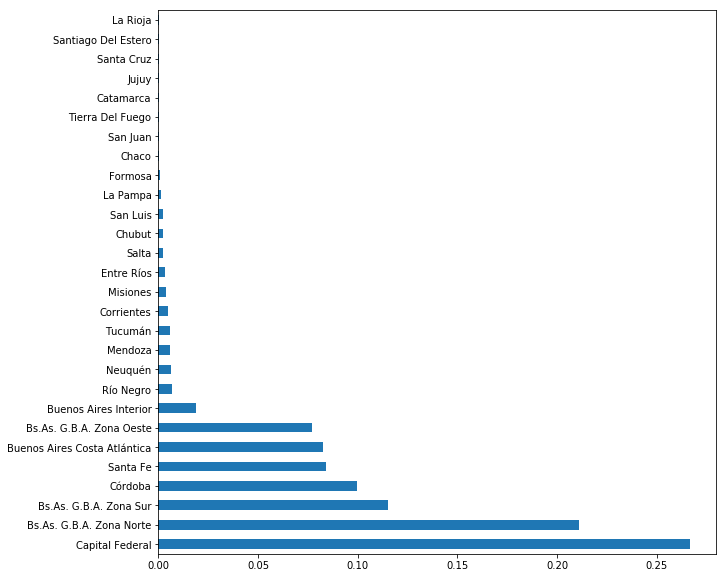

In [46]:
#Veamos una grafica de que Provincia tiene mayor publicaciones
df_ciudad_2[2].value_counts(normalize=True).plot.barh()

#### Conclusiones de los datos analizados de ubicación hasta el momento:
- Eliminamos las columas 'state_name', 'place_name' del DataSet
- Conservamos la columna 'place_with_parent_names', y trabajamos con el nivel de ubicacion que el nos proporciona:
        |- Pais
            |- Provincia
                |-Partidos-Departamentos
                    |-Municipio

Análisis de las columnas de geolocalización:
- Comparamos valores de las columnas lat, lon, y 'lat-lon' (valores nulos, igualdad)

In [47]:
# Tomamos  en un data frame las columnas en estudio
df_lat_lon = df.loc[:,['lat-lon','lat','lon']]
df_lat_lon.head()

,lat-lon,lat,lon
0,"-34.6618237,-58.5088387",-34.661824,-58.508839
1,"-34.9038831,-57.9643295",-34.903883,-57.964330
2,"-34.6522615,-58.5229825",-34.652262,-58.522982
3,"-34.6477969,-58.5164244",-34.647797,-58.516424
4,"-38.0026256,-57.5494468",-38.002626,-57.549447


In [48]:
#Analizamos valores nulos en cada columna:
valores_nulos(df_lat_lon)

lat-lon--->51550
lat--->51550
lon--->51550


In [49]:
#Dividismo valores lat-lon para poder comparar independientemente con lat y lon
df_lat_lon['lat_lon']= df_lat_lon['lat-lon'].astype(str)
df_div_lat_lon = df_lat_lon['lat_lon'].apply(lambda x:pd.Series(x.split(',')))
df_div_lat_lon.head()

,0,1
0,-34.6618237,-58.5088387
1,-34.9038831,-57.9643295
2,-34.6522615,-58.5229825
3,-34.6477969,-58.5164244
4,-38.0026256,-57.5494468


In [50]:
#Concatenamos
df_coord= pd.concat([df_lat_lon,df_div_lat_lon], axis = 1)

In [51]:
# convertimos en float el data frame y lo redondeamos a 4 decimas
df_coord = df_coord.drop(['lat-lon'], axis = 1)

In [52]:
df_coord= df_coord.astype(float)
df_coord = df_coord.round(4)
#Observamos algunos descriptivos:
df_coord.describe()

ValueError: could not convert string to float: '-34.6618237,-58.5088387'

Podemos Observar que lat y 0 poseen los mismo valores, que lon y 1 poseen los mismo valores<br>
Inspeccionamos:

In [ ]:
df_coord= df_coord.astype(float)
df_coord = df_coord.round(4)
#Eliminamos valores duplicados:
df_coord = df_coord.drop_duplicates()

In [ ]:
#valores nulso en este nuevo dataFrame:
valores_nulos(df_coord)

In [ ]:
#OBSERVAMOS QUE LOS VALORES DISTINTOS:
df_coord[df_coord['lat'] != df_coord[0]]

#### Conclusiones de los datos de Geolocalización:
Observamos que la columna 'lon-lat' tienes los mismo valores que 'lon' y 'lat'
Nos quedamos con las columnas 'lon', 'lat' para consultar  ubicacion en: https://datosgobar.github.io/georef-ar-api/
Eliminamos la columna 'lat-lon'

In [ ]:
#Completamos los valores restantes de ubicacion(Municipio)

In [ ]:
def consumir_api(row):
    try:
        url = 'https://apis.datos.gob.ar/georef/api/ubicacion?lat='+ str(row['lat']) + '&lon=' + str(row['lon'])
        response = (requests.get(url).text)
        response_json = json.loads(response)
        return response_json
    except Exception as e:
        raise e

In [ ]:
#Concatenamos df_ciudad_2 con df_properati[lat, lon]
df_local_coor = pd.concat([df_ciudad_2,df_properati.loc[:,['lat', 'lon']]], axis = 1)

In [ ]:
#SOlo nos interesa completar valores de la columna 4:
df_local_coor = df_local_coor[df_local_coor[4].isna() |(df_local_coor[4]=='')]

In [ ]:
#liminamos df con lat, lon en nan
df_local_coor = df_local_coor[df_local_coor['lat'].notna() |(df_local_coor['lon'].notna())]

In [ ]:
df_local_coor.shape[0]

In [ ]:
# Consultamos en la api estos valores de dataframe
df_local_coor['api'] = df_local_coor.apply(consumir_api, axis = 1)
df_local_coor['api']

In [ ]:
#Normalizamos JSON en el DATAFRAME
df = json_normalize(df_local_coor['api'])

<a id='section3_2_4'></a>
### 3.2.4 Precios:

In [ ]:
#PABLO

In [ ]:
#df.to_csv('properati_desafio1_grupo8.csv',index=True,index_label='index',encoding='utf-8')